# This Project is currently in progress 

In [6]:
%matplotlib inline
import numpy as np 
import scipy 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

In [2]:
#Dataframe
og_df = pd.read_csv("diabetes.csv")

In [5]:
og_df #printing the dataframe 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
og_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#seeing there are no missing values - we can move on to the second step of transforming data so scikit learn
#can interpret it

In [6]:
#setting the dependent and independent variables

y = og_df['Outcome'].copy()
x = og_df.iloc[:,:-1] #everything except the last column 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [8]:
# These values should be equal 
print(f"The number of elements in x_train = {len(x_train)}")
print(f"The number of elements in x_test = {len(x_test)}")
print(f"The number of elements in y_train = {len(y_train)}")
print(f"The number of elements in y_test = {len(y_test)}")

The number of elements in x_train = 576
The number of elements in x_test = 192
The number of elements in y_train = 576
The number of elements in y_test = 192


In [9]:
primary_dec_tree = DecisionTreeClassifier()
primary_dec_tree = primary_dec_tree.fit(x_train,y_train)

In [10]:
fig, ax = plt.subplots(figsize = (300,100))
plot_tree(primary_dec_tree,
          filled = True,
         rounded = True, 
         feature_names = x.columns)
#plt.savefig('firstpyDecTree.png')
plt.show()


### Confusion Matrix 

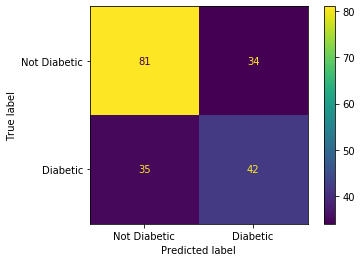

In [13]:
plot_confusion_matrix(primary_dec_tree, x_test, y_test, display_labels = [ 'Not Diabetic', 'Diabetic'] )

This confusion matrix suggests that the current tree is acurate at predicting non diabetic individuals

In [22]:
predicted_vals = primary_dec_tree.predict(x_test)

In [29]:
y_test = np.array(y_test)
y_test.shape

(192,)

In [32]:
metrics.accuracy_score(y_test, predicted_vals)

0.640625

In [34]:
metrics.precision_score(y_test, predicted_vals)

0.5526315789473685

In [35]:
metrics.recall_score(y_test, predicted_vals)

0.5454545454545454

In [36]:
metrics.balanced_accuracy_score(y_test, predicted_vals)

0.6249011857707509

As you can see based on a 1.0 score, we think the tree might be overfit to the training data 

In [39]:
#Fascinating way to suggest that the Training error is 0% but the testing error is extremely high.

foolin_rnd = primary_dec_tree.predict(x_train)


1.0